#### Notebook Imports and Packages

In [182]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example 1

## $f(x) = x^2 + x + 1$

In [100]:
def f(x):
    return x**2 + x + 1

In [101]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

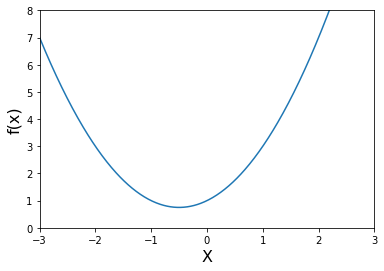

In [102]:
#Plot
plt.xlim([-3,3])
plt.ylim([0, 8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

#### Slope & Derivatives


In [103]:
def df(x):
    return 2*x + 1

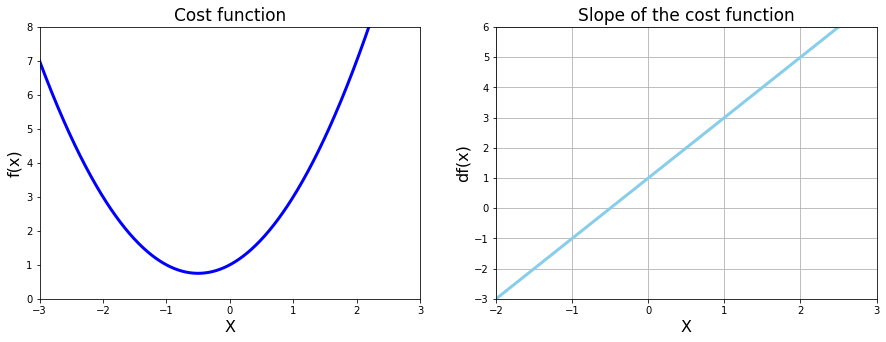

In [104]:
#Plot function and derivative side by side
plt.figure(figsize=[15,5])

# 1 Chart : Cost Function
plt.subplot(1, 2, 1)

plt.xlim([-3,3])
plt.ylim([0, 8])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)


# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim([-2,3])
plt.ylim([-3, 6])


plt.plot(x_1, df(x_1), color='skyblue', linewidth=3)


plt.show()

### Gradient Descent

In [105]:
#Gradient Descent

new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - gradient * step_multiplier
    
    step_size = abs(new_x - previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times: ',n)
        break
    
    
print('Local minimum occurs at: ', new_x)
print('Slope or df(x) value at this point is: ', df(new_x))
print('f(x) value or cost is: ' , f(new_x))

Loop ran this many times:  50
Local minimum occurs at:  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value or cost is:  0.7500000015970362


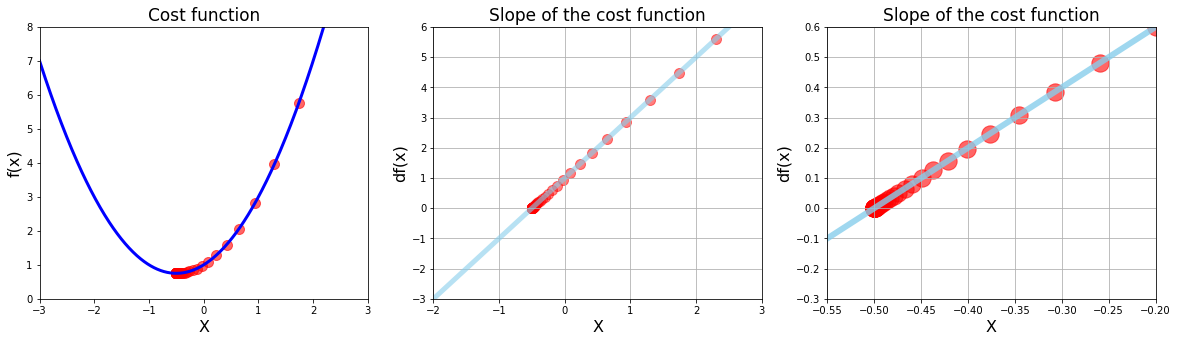

In [106]:
# Superimpose the gradient descent calculation
plt.figure(figsize=[20,5])

# 1 Chart : Cost Function
plt.subplot(1, 3, 1)

plt.xlim([-3,3])
plt.ylim([0, 8])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s= 100, alpha=0.6 )

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim([-2,3])
plt.ylim([-3, 6])

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative(Close Up)
plt.subplot(1, 3, 3)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim([-0.55,-0.2])
plt.ylim([-0.3, 0.6])

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

plt.show()

# Example 2- Multiple Minima vs Initial Guess & Adanced Functions
   ## $$g(x) = x^4 - 4x^2 + 5$$

In [107]:
#Make some data
x_2 = np.linspace(-2, 2, 1000)
def g(x):
    return x**4 - 4*x**2  +5
def dg(x):
    return 4*x**3 - 8*x

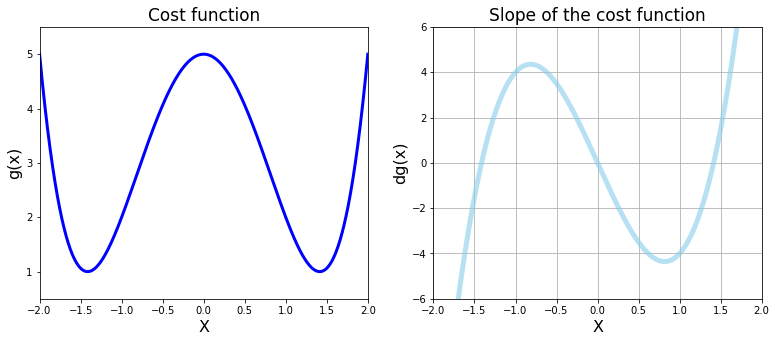

In [108]:
plt.figure(figsize=[20,5])

# 1 Chart : Cost Function
plt.subplot(1, 3, 1)

plt.xlim([-2,2])
plt.ylim([0.5, 5.5])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

values = np.array(x_list)
# plt.scatter(x_list, f(values), color='red', s= 100, alpha=0.6 )

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6, 6])

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
# plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative(Close Up)
# plt.subplot(1, 3, 3)

# plt.title('Slope of the cost function', fontsize=17)
# plt.xlabel('X', fontsize=16)
# plt.ylabel('df(x)', fontsize=16)
# plt.grid()
# plt.xlim([-0.55,-0.2])
# plt.ylim([-0.3, 0.6])

# plt.plot(x_2, dg(x_2), color='skyblue', linewidth=6, alpha=0.8)
# plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

plt.show()

## Gradient Descent as a Python Function

In [109]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=500):

    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient 

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision: 
            break
    return new_x, x_list, slope_list
    
    


In [110]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,initial_guess=0.5, 
                                                 multiplier=0.02, precision=0.001)
print('Local min occurs at: ', local_min)
print('Number of steps:', len(list_x))

Local min occurs at:  1.4122375085019094
Number of steps: 23


In [111]:
local_min, list_x, deriv_list = gradient_descent(dg,-0.5, 0.02, 0.001)
                                               
print('Local min occurs at: ', local_min)
print('Number of steps:', len(list_x))

Local min occurs at:  -1.4122375085019094
Number of steps: 23


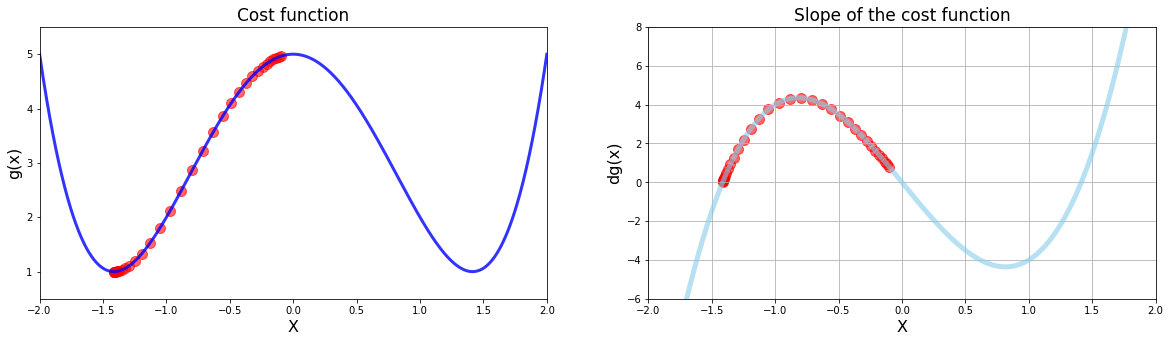

In [112]:
local_min, list_x, deriv_list = gradient_descent(dg,-0.1)

plt.figure(figsize=[20,5])

# 1 Chart : Cost Function
plt.subplot(1, 2, 1)

plt.xlim([-2,2])
plt.ylim([0.5, 5.5])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='r', s=100, alpha=0.6)


# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6, 8])

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='r', s=100, alpha=0.6)

plt.show()

## Example 3 - Divergence, Overflow, and Python Tuples
## $$x^5 - 2x^4 + 2$$

In [113]:
#Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3

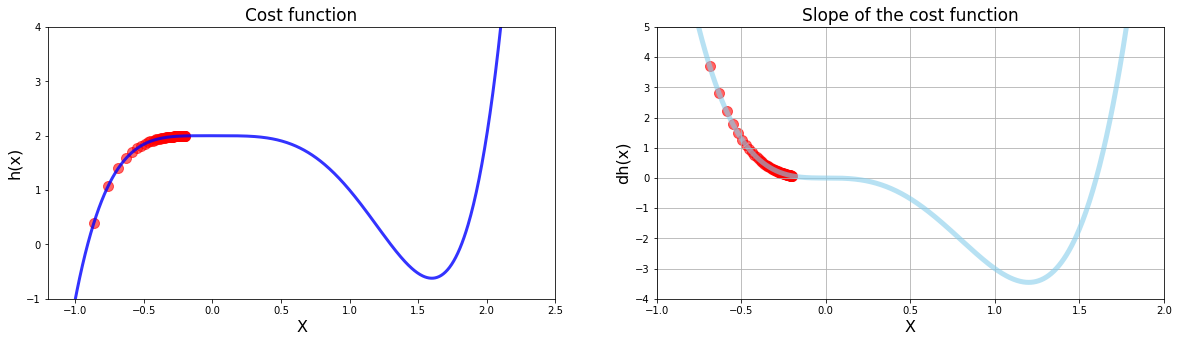

Local min occurs at:  -1.8398461123332792e+24
Cost at this minimun is:  -2.1081790694225687e+121
Number of steps:  72


In [114]:
local_min, list_x, deriv_list = gradient_descent(dh,-0.2, max_iter=71)

plt.figure(figsize=[20,5])

# 1 Chart : Cost Function
plt.subplot(1, 2, 1)

plt.xlim([-1.2,2.5])
plt.ylim([-1, 4])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='r', s=100, alpha=0.6)


# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim([-1,2])
plt.ylim([-4, 5])

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='r', s=100, alpha=0.6)

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimun is: ', h(local_min))
print('Number of steps: ', len(list_x))


In [115]:
import sys
sys.float_info.max

1.7976931348623157e+308

## The Learning Rate

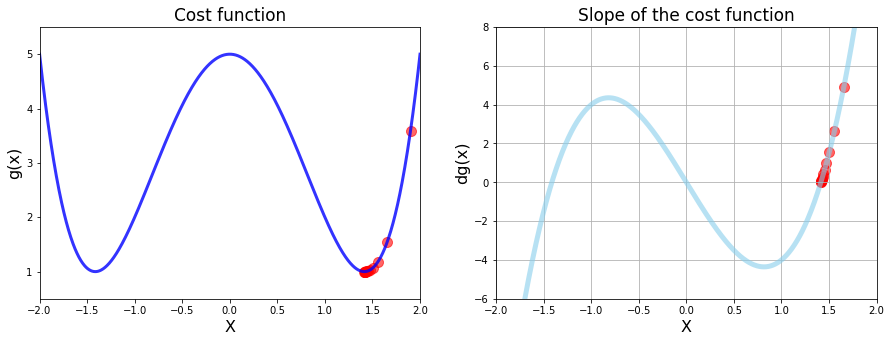

Local min occurs at:  1.415879815113846
Cost at this minimun is:  -0.34751175621515884
Number of steps:  14


In [116]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                                multiplier=0.02, max_iter=500)

plt.figure(figsize=[15,5])

# 1 Chart : Cost Function
plt.subplot(1, 2, 1)

plt.xlim([-2,2])
plt.ylim([0.5, 5.5])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='r', s=100, alpha=0.6)


# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6, 8])

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='r', s=100, alpha=0.6)

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimun is: ', h(local_min))
print('Number of steps: ', len(list_x))


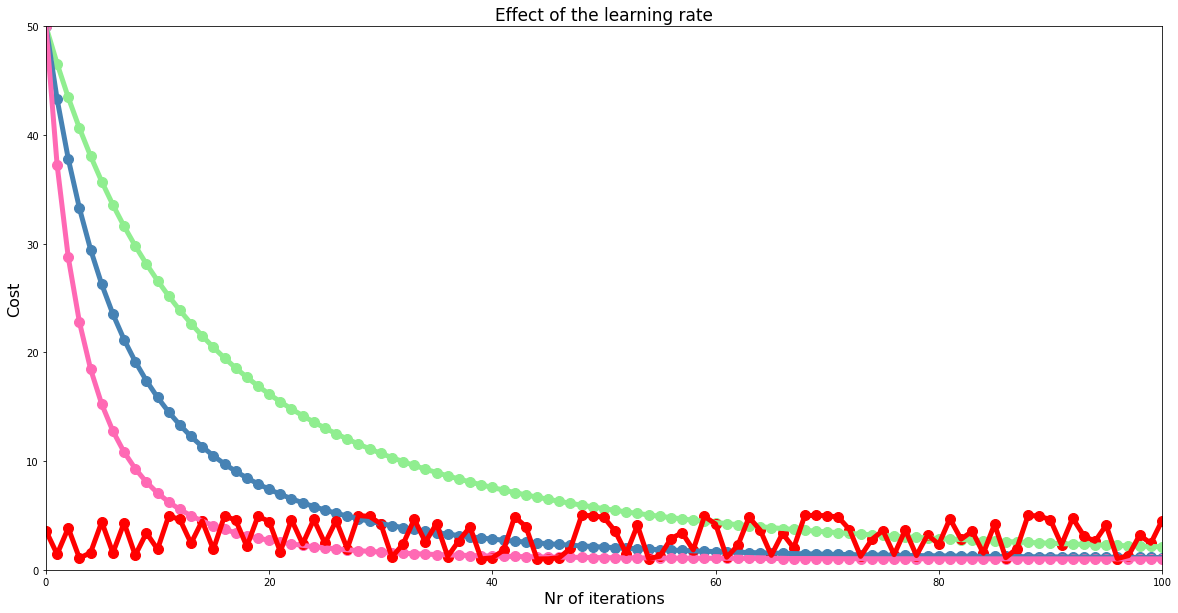

In [117]:
#Run gradient descent 3 times 
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                                                multiplier=0.0005, precision=0.0001, max_iter=n)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                                                multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                                                multiplier=0.002, precision=0.0001, max_iter=n)
#Experiment

insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                                multiplier=0.25, precision=0.0001, max_iter=n)


# Plotting reduction in cost for each iteration
plt.figure(figsize=[20,10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

#Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])


# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0,n+1))

# Low_Gamma
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=100)

#Mid_Gamma
plt.plot(iteration_list, g(mid_values), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(mid_values), color='steelblue', s=100)

#High_Gamma
plt.plot(iteration_list, g(high_values), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(high_values), color='hotpink', s=100)

#Insane_Gamma
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='r', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='r', s=100)

plt.show()

# Example 4 - Data Viz with 3D Charts
## Minimize $$f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

In [118]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [119]:
 # Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)
# print(x_4)
x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)
# print(x_4)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


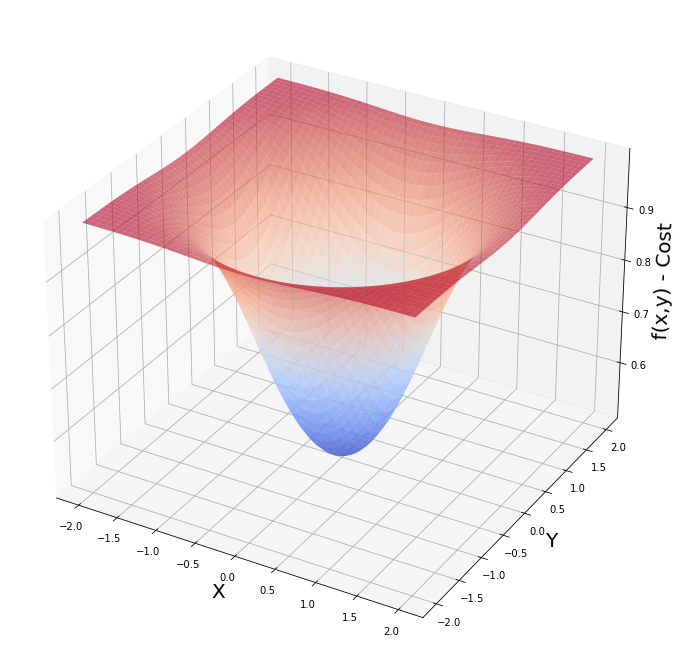

In [120]:
# Generating 3D Plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)
ax.plot_surface(x_4, y_4, f(x_4, y_4 ), cmap=cm.coolwarm, alpha=0.6)
plt.show()

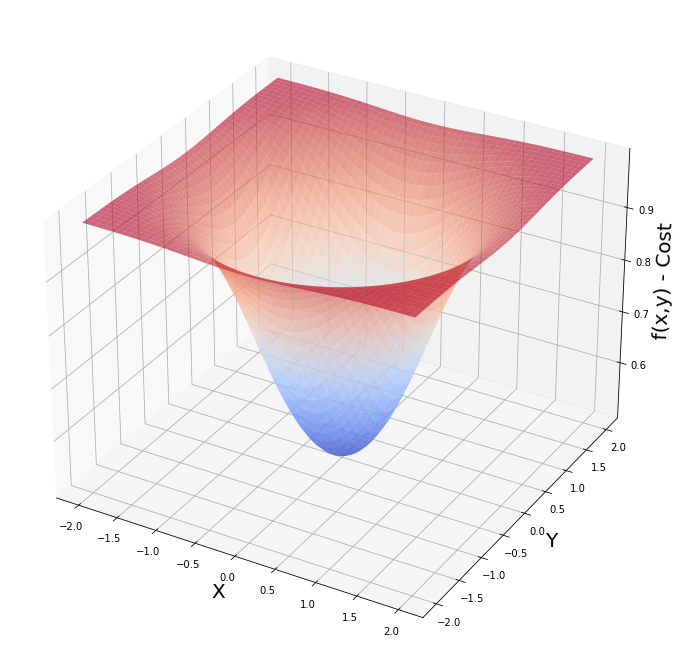

In [121]:
# Generating 3D Plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)
ax.plot_surface(x_4, y_4, f(x_4, y_4 ), cmap=cm.coolwarm, alpha=0.6)
plt.show()

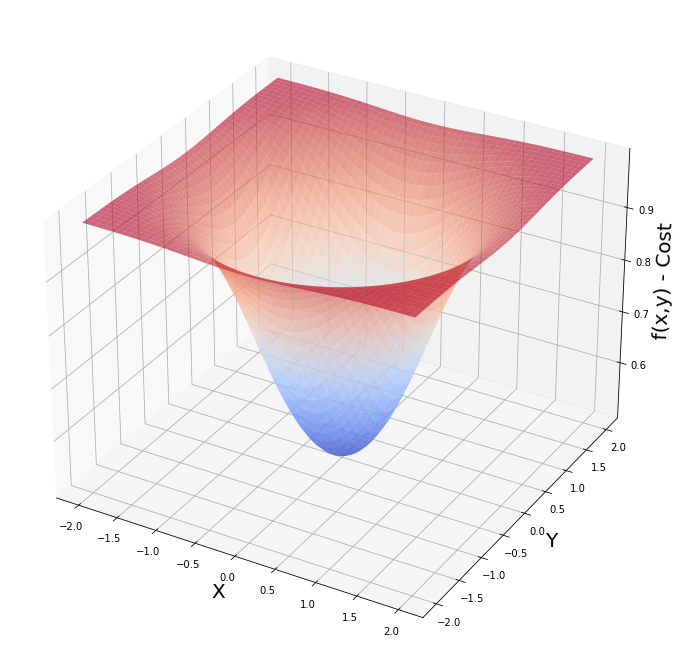

In [122]:
# Generating 3D Plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)
ax.plot_surface(x_4, y_4, f(x_4, y_4 ), cmap=cm.coolwarm, alpha=0.6)
plt.show()

In [123]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess


for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0],params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Partial Derivaties & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 -y^2}}{(3^{-x^2 -y^2} + 1)^2}$$
## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 -y^2}}{(3^{-x^2 -y^2} + 1)^2}$$

In [124]:
a, b = symbols('x,y')
print('Our cost function f(x,y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a,b), a))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',f(a, b).evalf(subs={a:1.8, b:1.0}))
print('Value of partial derivative with respect to x at x=1.8 y=1.0 is: ',diff(f(a,b),a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x,y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative with respect to x at x=1.8 y=1.0 is:  0.0368089716197505


## Batch Gradient Descent with SymPy

In [125]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess


for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0],params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [126]:
# Partial derivative functions example 4
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r+1)**2
def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r+1)**2

In [127]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess


for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0],params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [140]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1,2)
print(values_array)
print(values_array.shape)


for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1,2), 0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0)

print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0],params[1]))
print(values_array)

[[1.8 1. ]]
(1, 2)
Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000
[[1.8 1.0]
 [1.79631910283802 0.997955057132236]
 [1.79257650433180 0.995875835739887]
 ...
 [3.87209562839663e-11 2.15116423799813e-11]
 [3.65939903638390e-11 2.03299946465772e-11]
 [3.45838599885832e-11 1.92132555492129e-11]]


In [129]:
# Advanced Numpy Array Practice:

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]', hs_band[0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

print('Printing nicknames...',the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles ...', the_roots[:, 1])
hs_band.reshape(1,4)

(1, 2)
(2, 2)
hs_band[0] ['Black Thought' 'MC']
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing band roles ... ['MC' 'Drums' 'Guitar' 'MC']


array([['Black Thought', 'MC', 'Questlove', 'Drums']], dtype='<U13')

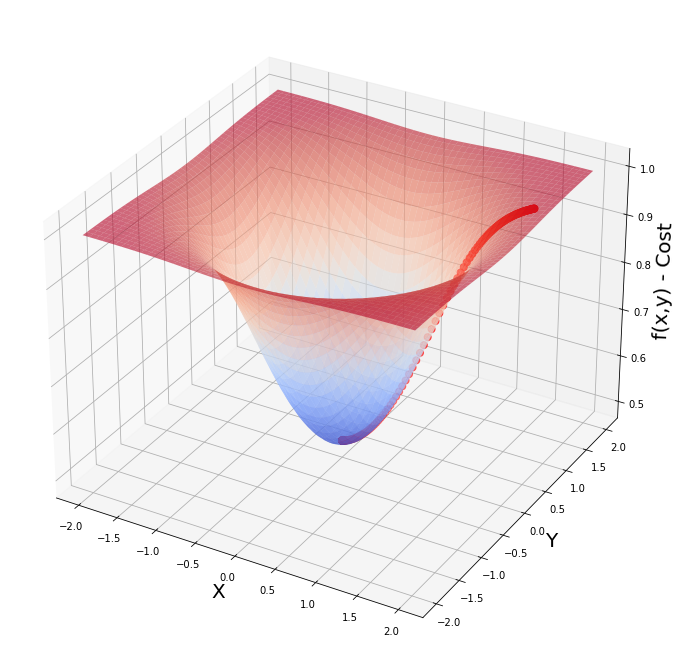

In [136]:
# Generating 3D Plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4 ), cmap=cm.coolwarm, alpha=0.6)
ax.scatter(values_array[:, 0], values_array[:, 1], 
           f(values_array[:, 0], values_array[:, 1]), s=50, color='r')

plt.show()

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$ 
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}  \big)^2 $$ 
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$ 

In [164]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4 , 8.2]).reshape(7,1)

print('Shape of x_5 array: ', x_5.shape)
print('Shape of y_5 array: ', y_5.shape)

Shape of x_5 array:  (7, 1)
Shape of y_5 array:  (7, 1)


In [169]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0: ', regr.intercept_)
print('Theta 1: ', regr.coef_)

Theta 0:  [0.84753515]
Theta 1:  [[1.22272646]]


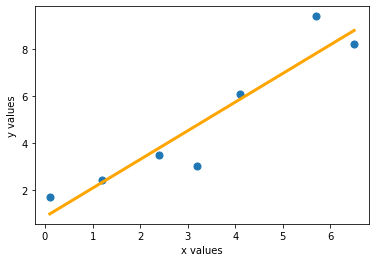

In [172]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [173]:
#y_hat = thetha0 + thetha1*x
y_hat = 0.84753515 + x_5 * 1.22272646378
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.9698078 ]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [180]:
# Challenge : Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(actual, predicted):
    return (1/actual.size)* (sum((actual-predicted)**2))

In [183]:
print('Manually calculated mse is: ',mse(y_5, y_hat))
print('MSE regression using manual calc is: ', mean_squared_error(y_5, y_hat))
print('MSE regression is: ', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated mse is:  [0.94796558]
MSE regression using manual calc is:  0.9479655759794579
MSE regressionis:  0.9479655759794577


## 3D Plot for the MSE Cost Function

## Make data for thetas

In [260]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)
plot_t0

array([[-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       ...,
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ]])

## Calc MSE using nested for loops

In [212]:
plot_cost = np.zeros((nr_thetas ,nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


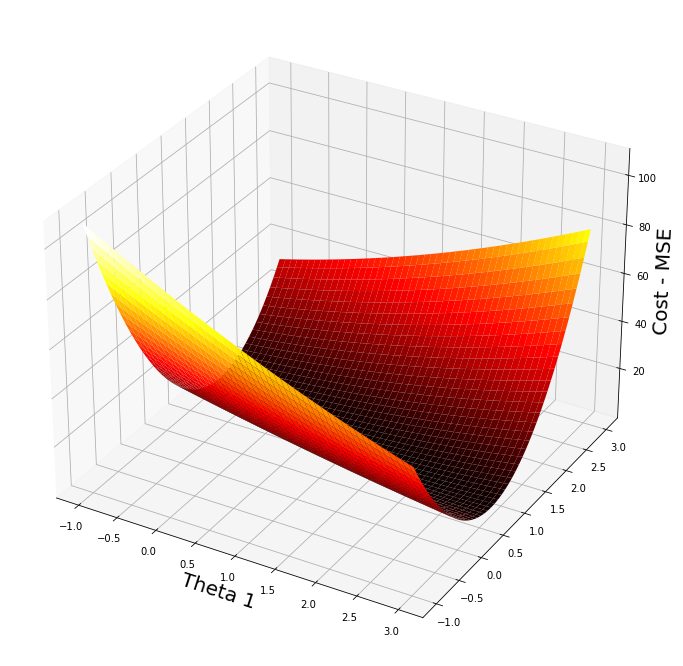

In [203]:
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_xlabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [211]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])


Min value of plot_cost 0.9483826526747163
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^n \big(y^{(i)}-\theta_0 -\theta_1 x^{(i)}\big)$$

## $$\frac{\partial MSE }{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^n \big(y^{(i)}-\theta_0 -\theta_1 x^{(i)}\big) \big( x^{(i)}\big)$$


## MSE & Gradient Descent

In [267]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    theta0_slope = (-2/n) *  sum(y - thetas[0] - x*thetas[1] ) 
    theta1_slope = (-2/n) *  sum((y - thetas[0] - x*thetas[1]) * x)
    #return np.append(arr=theta_0_slope, values=theta_1_slope)
    #return np.array([theta0_slope[0], theta1_slope[0]])
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [283]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] +  thetas[1] * x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    #Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1] * x_5))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


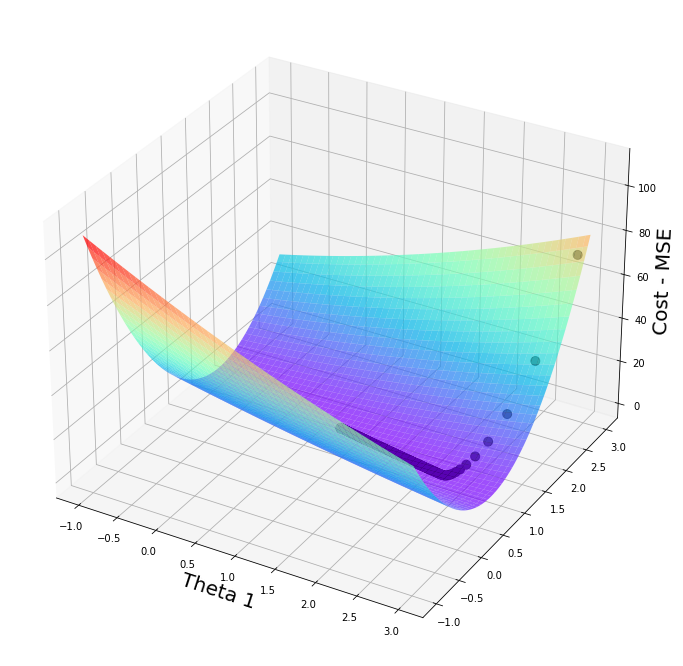

In [288]:
# Plotting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_xlabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.7)
plt.show()